In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import random
style.use('fivethirtyeight')

In [3]:
dataset={'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_feature=[5,7]

<function matplotlib.pyplot.show(*args, **kw)>

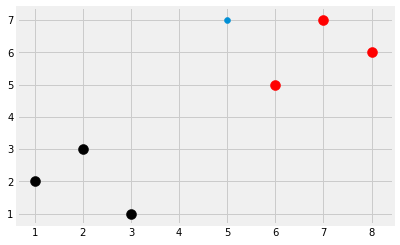

In [4]:
# [[ plt.scatter(ii[0],ii[1],s=100,color=i)  for ii in dataset[i] ] for i in dataset]
for i in dataset :
    for ii in dataset[i] :
        plt.scatter(ii[0],ii[1],s=100,color=i)
plt.scatter(new_feature[0],new_feature[1])
plt.show
#euclid_dist=sqrt( (f[0]-p[0])**2 + (f[1]-p[1])**2 )

In [5]:
def k_N_N(data,predict,k=3):
    if len(data)>=k:
        warnings.warn('fuck off idiot')
    distance=[]
    for group in data:
        for features in data[group]:
            euclid_dist=np.linalg.norm(np.array(features)-np.array(predict))
            distance.append([euclid_dist,group])
    votes=[i[1] for i in sorted(distance) [:k]]
    #print(Counter(votes).most_common(1))
    vote_res=Counter(votes).most_common(1)[0][0]
    confidence=Counter(votes).most_common(1)[0][1]/k
    return vote_res,confidence

r
1.0


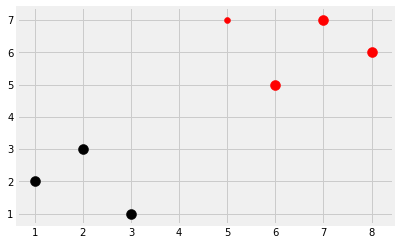

In [6]:
result,confidence=k_N_N(dataset,new_feature,k=3)
print(result)
print(confidence)
[[ plt.scatter(ii[0],ii[1],s=100,color=i)  for ii in dataset[i] ] for i in dataset]
plt.scatter(new_feature[0],new_feature[1],color=result)
plt.show()

In [7]:
accuracies=[]
for i in range(25):
    df=pd.read_csv('breast-cancer-wisconsin.data.txt')
    df.replace('?',-99999,inplace=True)
    df.drop(['id'],1,inplace=True)
    full_data=df.astype(float).values.tolist()
    random.shuffle(full_data)

    test_size=0.2
    train_set={2:[],4:[]}
    test_set={2:[],4:[]}
    train_data=full_data[:-int(test_size*len(full_data))]
    test_data=full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct=0
    total=0

    for group in test_set:
        for data in test_set[group]:
            vote,confidence=k_N_N(train_set,data,k=5)
            if group==vote:
                correct+=1
            #else :
             #   print(confidence)
            total+=1
        #print('accuracy :',correct/total)
        accuracies.append(correct/total)

print(sum(accuracies)/len(accuracies))

0.9752165941781631
